In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [2]:
bs = 64

In [3]:
path_base = untar_data(URLs.PETS)
path = path_base/'images'

In [4]:
csv_name = 'labels.csv'

In [5]:
import pandas as pd
df = pd.read_csv(path_base/csv_name)
df.head()

,name,label
0,images/Siamese_87.jpg,Siamese
1,images/chihuahua_126.jpg,chihuahua
2,images/german_shorthaired_97.jpg,german_shorthaired
3,images/Bombay_157.jpg,Bombay
4,images/Bengal_12.jpg,Bengal


Populating the interactive namespace from numpy and matplotlib


/home/CW01/uia94835/miniconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['array', 'random', 'uniform', 'pad', 'copy', 'partition', 'subplots', '__version__']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


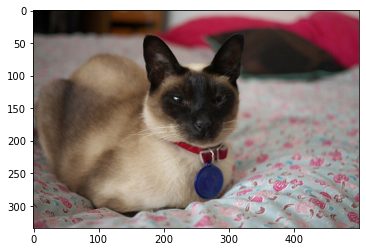

In [6]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(path/'Siamese_87.jpg')
imgplot = plt.imshow(img)
plt.show()

In [7]:
tfms = get_transforms()

In [8]:
np.random.seed(2)

In [9]:
src = ImageList.from_csv(path_base, csv_name=csv_name).split_by_rand_pct(0.4, seed=2).label_from_df(cols='label')

In [10]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

In [11]:
data = get_data(224, bs)

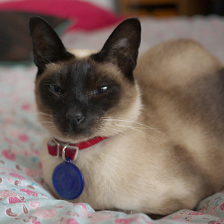

In [12]:
src.train[0][0]

In [13]:
src.train[0][1]

Category Siamese

In [16]:
gc.collect()

22

### Basic sequential model

In [17]:
model = nn.Sequential(
    nn.Conv2d(3, 32, 3, stride = 2, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32, 64, 3, stride = 2, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64, 128, 3, stride = 2, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.Conv2d(128, 256, 3, stride = 2, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.Conv2d(256, 512, 3, stride = 2, padding=1),
    nn.BatchNorm2d(512),
    nn.ReLU(),
    nn.Conv2d(512, 512, 3, stride = 2, padding=1),
    nn.BatchNorm2d(512),
    nn.ReLU(),
    nn.Conv2d(512, 256, 3, stride = 2, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.Conv2d(256, 37, 3, stride = 2, padding=1),
    nn.BatchNorm2d(37),
    nn.Flatten()
)

In [18]:
learn = Learner(data, model, loss_func=nn.CrossEntropyLoss(), metrics=error_rate)

In [19]:
learn.fit_fc(100,3e-3, start_pct=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,3.708650,3.832872,0.926590,00:09
1,3.506783,3.326645,0.901556,00:07
2,3.319016,3.167335,0.873139,00:08
3,3.176849,3.070138,0.848106,00:07
4,3.109257,3.014157,0.832544,00:07
5,3.036095,3.020398,0.829838,00:08
6,2.971258,2.981142,0.823410,00:08
7,2.874815,2.863627,0.792625,00:08
8,2.803118,2.867770,0.800068,00:07
9,2.708380,2.696125,0.746617,00:08


In [20]:
learn.save('basetrain-owncnn-lr3e3-ep100-fitfc05')

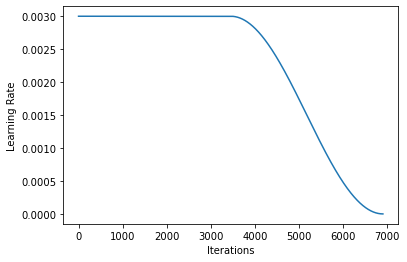

In [21]:
learn.recorder.plot_lr()

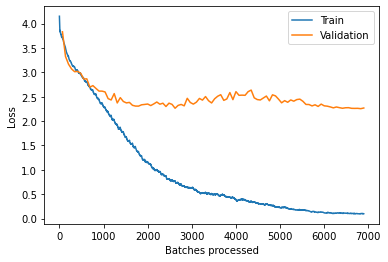

In [22]:
learn.recorder.plot_losses()

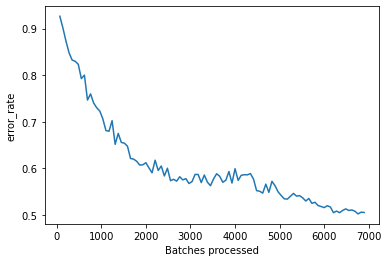

In [23]:
learn.recorder.plot_metrics()

In [24]:
learn.validate()

[2.2692237, tensor(0.5051)]

In [25]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

### ResNet18

In [26]:
learn = cnn_learner(data, models.resnet18, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=False)

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


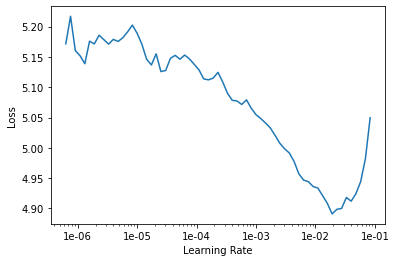

In [29]:
learn.recorder.plot(skip_end=15)

In [27]:
learn.fit_fc(100,3e-3, start_pct=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,4.350196,3.967804,0.934371,00:12
1,4.070053,3.555086,0.906631,00:11
2,3.890789,3.526480,0.899526,00:11
3,3.740116,7.922951,0.941137,00:11
4,3.618269,3.962620,0.887686,00:11
5,3.557997,3.374894,0.854533,00:11
6,3.450646,3.239967,0.826455,00:11
7,3.337396,4.040693,0.828823,00:11
8,3.277627,2.873604,0.791272,00:11
9,3.159182,6.359440,0.815968,00:12


In [28]:
learn.save('basetrain-res18-lr3e3-ep100-fitfc05')

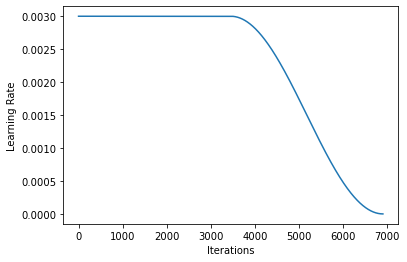

In [29]:
learn.recorder.plot_lr()

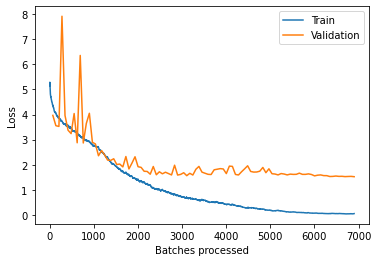

In [30]:
learn.recorder.plot_losses()

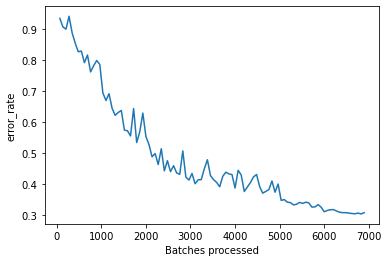

In [31]:
learn.recorder.plot_metrics()

In [32]:
learn.validate()

[1.5203418, tensor(0.3072)]

In [33]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

### ResNet34

In [34]:
learn = cnn_learner(data, models.resnet34, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=False)

In [35]:
learn.fit_fc(100,3e-3, start_pct=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,4.439783,4.336151,0.963126,00:16
1,4.209154,3.852887,0.934032,00:16
2,3.941869,4.365870,0.927943,00:16
3,3.795034,5.447844,0.927605,00:16
4,3.691276,3.337948,0.882950,00:16
5,3.561687,3.478199,0.888363,00:16
6,3.550393,3.359629,0.889039,00:16
7,3.447903,4.284766,0.822395,00:16
8,3.420130,11.818151,0.903248,00:16
9,3.341785,3.155324,0.847091,00:16


In [36]:
learn.save('basetrain-res34-lr3e3-ep100-fitfc05')

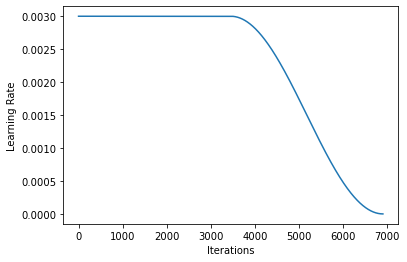

In [37]:
learn.recorder.plot_lr()

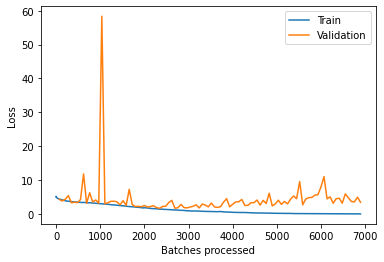

In [38]:
learn.recorder.plot_losses()

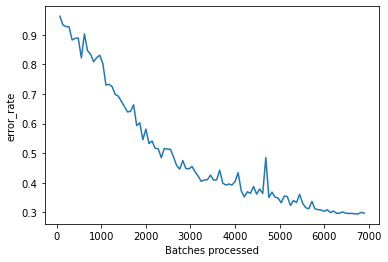

In [39]:
learn.recorder.plot_metrics()

In [40]:
learn.validate()

[3.4755867, tensor(0.2974)]

In [41]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

### ResNet50

In [42]:
learn = cnn_learner(data, models.resnet50, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=False)

In [43]:
learn.fit_fc(100,3e-3, start_pct=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,4.436005,4.018139,0.952639,00:32
1,4.041156,3.351824,0.902233,00:30
2,3.887990,3.169466,0.852503,00:30
3,3.847026,3.601619,0.919486,00:30
4,3.903028,8.233783,0.923884,00:30
5,3.858294,82.890182,0.978011,00:30
6,3.851913,41.195442,0.948579,00:30
7,3.672098,4.613068,0.885656,00:30
8,3.736393,9.508851,0.942828,00:30
9,3.649081,3.258136,0.881597,00:30


In [44]:
learn.save('basetrain-res50-lr3e3-ep100-fitfc05')

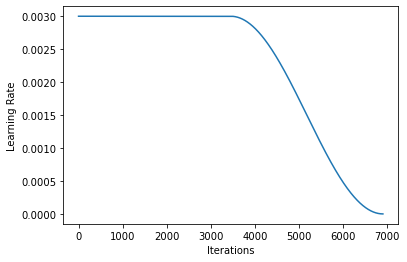

In [45]:
learn.recorder.plot_lr()

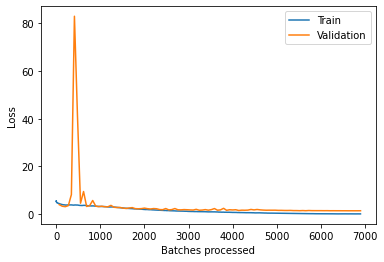

In [46]:
learn.recorder.plot_losses()

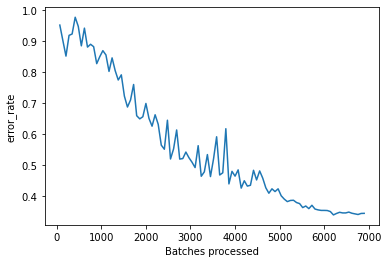

In [47]:
learn.recorder.plot_metrics()

In [48]:
learn.validate()

[1.4627441, tensor(0.3447)]

In [49]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

### ResNet101

In [50]:
learn = cnn_learner(data, models.resnet101, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=False)

In [51]:
learn.fit_fc(100,3e-3, start_pct=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,4.493634,7.157885,0.962111,00:46
1,4.182454,3.569005,0.914073,00:46
2,3.921248,3.424856,0.917456,00:46
3,3.732109,7.089731,0.897497,00:46
4,3.633170,4.250114,0.831867,00:46
5,3.547329,3.602419,0.821042,00:46
6,3.430752,12.325710,0.809878,00:46
7,3.370478,6.570544,0.815629,00:46
8,3.278322,3.035717,0.806834,00:46
9,3.398072,11604.666992,0.936739,00:46


In [52]:
learn.save('basetrain-res101-lr3e3-ep100-fitfc05')

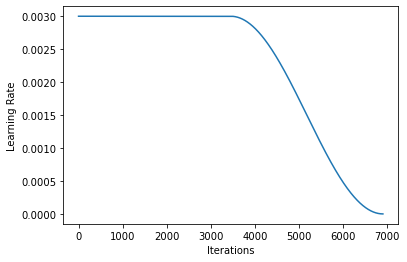

In [53]:
learn.recorder.plot_lr()

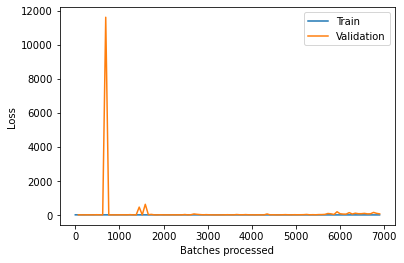

In [54]:
learn.recorder.plot_losses()

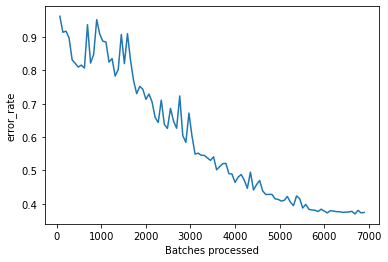

In [55]:
learn.recorder.plot_metrics()

In [56]:
learn.validate()

[62.39995, tensor(0.3742)]

In [57]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0